# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [5]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [6]:
def conv_fn(x,h):
    
    k = len(x) + 2*len(h) #we need to create an array wich will be longer then our start array in two times 
    y = np.zeros ((k,))
    for i in range (0, len(x)):
        y[i+len(h)]=x[i]
    h_flip = h[::-1] 
   
    result = np.zeros ((k,))
    for i in range(0, k-1):
        result[i] = 0
        for j in range (0, len(h) ):
            result[i] += y[i-j] * h[j]         
    
    return result





x = [1,2,3,4]

def step(n=0, N=5):
    s = np.zeros((N, ))
    for idx_s in np.arange(n, N):
        s[idx_s] = 1
    
    return s

def dirac(n=0, N=5):
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    s = np.zeros((N, ))
    s[n] = 1
    
    return s


In [7]:
h1 = np.array([-1., 1.])
k = dirac ()
h = step()
resp = conv_fn(x,h)  
resp_st = np.convolve(x,h)
resp1 = conv_fn (x,k)
resp1_st = np.convolve(x,k)
y1 = conv_fn(x,h1)
y = np.convolve(x,h1)
print ('result 1 with step function') 
print (resp)
print (resp_st)

print ('result 2 with dirac function') 
print (resp1)
print (resp1_st)

print ('result 3 ') 
print (y)
print (y1)
  


result 1 with step function
[  0.   0.   0.   0.   0.   1.   3.   6.  10.  10.   9.   7.   4.   0.]
[  1.   3.   6.  10.  10.   9.   7.   4.]
result 2 with dirac function
[ 0.  0.  0.  0.  0.  1.  2.  3.  4.  0.  0.  0.  0.  0.]
[ 1.  2.  3.  4.  0.  0.  0.  0.]
result 3 
[-1. -1. -1. -1.  4.]
[ 0.  0. -1. -1. -1. -1.  4.  0.]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [98]:
def conv2d (k, x ):
    # find center position of kernel (half of kernel size)
    kCenterX = len(k) // 2
    if (len(k) % 2 == 1):
        kCenterX += 1
    kCenterY = len(k[0]) // 2 
    if (len(k[0]) % 2 == 1):
        kCenterY += 1
    temp_h = len(x) + 2 * len(k)
    temp_w = len(x[0]) + 2 * len(k[0])
    out = np.zeros ((temp_h, temp_w))
    #rows
    for i in range (0, len(x)):
        # columns
         for j in range (0, len(x [0])):
                #kernel rows
                for m in range (0, len(k)):
                    mm = len(k) - 1 - m
                    #row index of flipped kernel
                    # kernel columns
                    for n in range (0, len(k [0])):
                        nn = len(k[0]) - 1 - n
                        # column index of flipped kernel
                        # index of input signal, used for checking boundary
                        ii = i + (m - kCenterY)
                        jj = j + (n - kCenterX)
                        if( ii >= 0 and ii < len(x) and jj >= 0 and jj < len(x[0]) ):
                            out[i][j] += x[ii][jj] * k[mm][nn];
                                                
    return out

            
          

[[ 0.00390625  0.015625    0.0234375   0.015625    0.00390625]
 [ 0.015625    0.0625      0.09375     0.0625      0.015625  ]
 [ 0.0234375   0.09375     0.140625    0.09375     0.0234375 ]
 [ 0.015625    0.0625      0.09375     0.0625      0.015625  ]
 [ 0.00390625  0.015625    0.0234375   0.015625    0.00390625]]


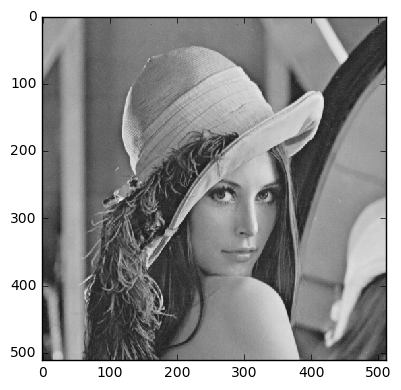

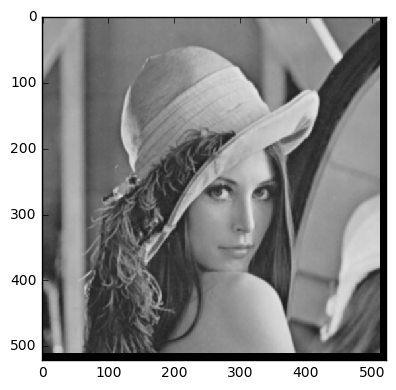

In [104]:
matrix_k = (1/256)*np.array([[1, 4, 6, 4, 1],
                     [4, 16, 24, 16, 4],
                     [6, 24, 36, 24, 6],
                     [4, 16, 24, 16, 4],
                     [1, 4, 6, 4, 1]])
print (matrix_k)

Path = ('../images/')
image_name = ('lena-grey.bmp')
lena_im = io.imread(Path.__add__(image_name))

lena_float = img_as_float(lena_im)

conv_lena = conv2d (matrix_k, lena_float)

plt.figure
io.imshow(lena_float, cmap=plt.cm.gray)
plt.show()

plt.figure
io.imshow(conv_lena, cmap=plt.cm.gray)
plt.show()


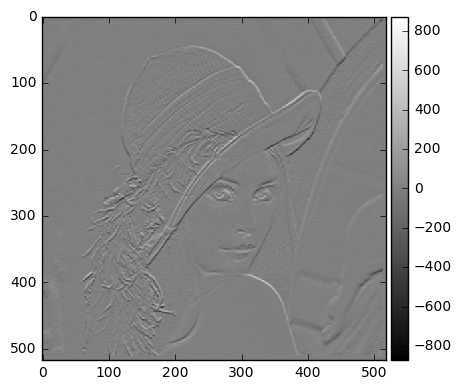

In [106]:
from scipy import ndimage

k_sobel_x = np.array ([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0 ,-1]])
k_sobel_y = np.array ([[1, 2, 1],
                      [0, 0 , 0],
                      [-1, -2, -1]])
sob1 = conv2d (k_sobel_x, lena_im)
sob2 = conv2d (k_sobel_y, lena_im)

plt.figure
io.imshow(sob2, cmap=plt.cm.gray)
plt.show()



## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

[[False False False False False False False False False False False False
  False False False False]
 [False False False False False False  True  True  True  True  True False
  False False False False]
 [False False False False  True  True False False False False  True  True
  False False False False]
 [False False False False  True  True False False False False  True  True
  False False False False]
 [False False False False  True  True False False False False  True  True
  False False False False]
 [False False False False False False False False False  True  True  True
  False False False False]
 [False False False False False False  True  True  True False  True  True
  False False False False]
 [False False False False  True  True  True False False False  True  True
  False False False False]
 [False False False  True  True  True False False False False  True  True
  False False False False]
 [False False False  True  True False False False False False  True  True
  False False Fal

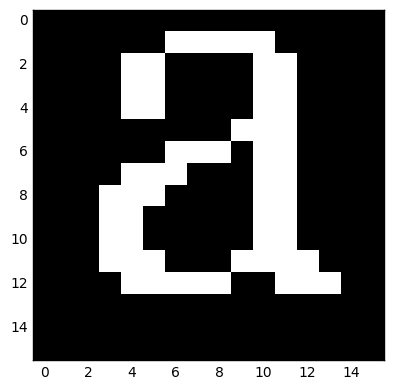

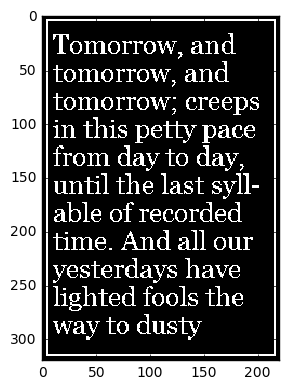

In [122]:
from skimage.filter import threshold_otsu
from skimage import img_as_float

Path = ('../images/')
image1 = ('a.png')
a_im = io.imread(Path.__add__(image1), as_grey=True)

image2 = ('text.png')
text_im = io.imread(Path.__add__(image2), as_grey=True)

a_bin = threshold_otsu (a_im)
text_bin = threshold_otsu (text_im)

binary_a = a_im < a_bin
binary_text = text_im < text_bin
print (binary_a)
binary_text = img_as_float(binary_text)
binary_a = img_as_float(binary_a)
print (binary_a)
plt.figure
io.imshow(binary_a, cmap=plt.cm.gray)
plt.show()

plt.figure
io.imshow(binary_text, cmap=plt.cm.gray)
plt.show() 

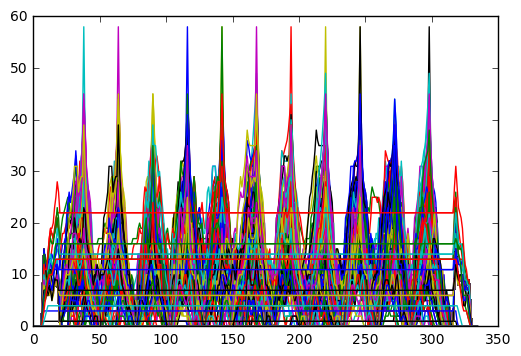

In [119]:
from scipy import signal

corr = signal.correlate2d (binary_text, binary_a)
plt.plot(corr)

In [ ]:
as we can see we have 11 pics of pur histgram that equilent to number of *a* in the text